<a href="https://colab.research.google.com/github/al00pes/Homologacao_sprint_II/blob/main/MVP_Machine_learning_Arthur_Lopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP Machine learning:**

**Profs : Hugo Villamizar e Patrick Happ**

**Autor:  Arthur Lopes.**]

**Problema de classificação **

Classificação de faixa de preço de celular para uma fabricante lançar o produto no mercado



# 1. Definição do problema

**Introdução**

Bob abriu sua própria empresa de telefonia móvel. Ele quer lutar duramente contra grandes empresas como Apple, Samsung etc.

Ele não sabe estimar o preço dos celulares que sua empresa cria. Neste competitivo mercado de telefonia móvel, você não pode simplesmente assumir as coisas. Para resolver esse problema, ele coleta dados de vendas de telefones celulares de várias empresas.

Bob quer descobrir alguma relação entre as características de um telefone celular (por exemplo:- RAM, memória interna, etc.) e seu preço de venda. Mas ele não é tão bom em Machine Learning. Então ele precisa de sua ajuda para resolver este problema.

Neste problema, você não precisa prever o preço real, mas uma faixa de preço que indica quão alto é o preço

Descrições da variavel contida no dataset:

* **Battery_power**= Energia total que uma bateria pode armazenar em um tempo medido em mAh

* **Blue** = Tem bluetooth ou não

* **clock_speed** = velocidade na qual o microprocessador executa instruções

* **dual_sim** = Tem suporte para dois chip ou não

* **FC** = Mega Pixels da câmera frontal

* **four_g** = Tem suporte a 4G ou não

* **int_memory** = Memoria internal em Gb

* **m_dep** = Profundida do celular em CM

* **Mobile_wt** = Peso do celular

* **n_cores** = Numeros de nucleos do processador

* **PC** = Mega Pixels em câmera digital

* **px_height** = Tamanho da resolução dos pixels

* **px_width** = Largura da resolução do pixels

* **ram** = Memoria de acesso aleatório em Mb

* **sc_h** = Altura da tela do celular em cm

* **sc_w** = Largura da tela do celular em CM

* **talk_time** = Tempo maximo que a bateria suporte somente com uma carga

* **three_g** = Tem 3g ou não

* **touch_screen** = Possui touch screen ou não

* **wifi** = Possui wifi ou não




**Objetivo : **

 Descobrir alguma relação entre as características de um telefone celular (por exemplo:- RAM, memória interna, etc.) e seu preço de venda.
 obs: Problema de classificação



# 1: Importação das bibliotecas necessárias

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from sklearn.preprocessing import LabelEncoder # para transformar atributos categóricos em numéricos
from sklearn.preprocessing import StandardScaler # para padronização dos atributos
from sklearn.preprocessing import MinMaxScaler # para normalização dos atributos
from sklearn.model_selection import train_test_split # para aplicação do holdout
from sklearn.model_selection import KFold # para preparar os folds de validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 2: Carga de dados

Utilizei a biblioteca do Pandas para carregando um arquivo com a extensão em .csv e trasnforma-lo em um dataframe para ter um melhor desempenho para manipular os dados

In [ ]:
# Informa a URL de importação do dataset

url = 'https://raw.githubusercontent.com/al00pes/Homologacao_sprint_II/main/mobile_train.csv'

#Transforma o arquivo em dataframe

df = pd.read_csv(url)

# 3: Analise dos dados

Nessa etapa iremos analizar os conjuntos de dados e verificar se existe alguma inconstência que possa prejudicar ou demanda mais esforçado para a melhor escolha do algoritmo

In [ ]:
#Exibe as 5 primeiras linhas
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#Exibi as 5 ultimas linhas
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Utilizando as funções .info() e .isnull(), foi possível verificar que o dataset possui exatamente 2000 linhas, 21 atributos e não possui valores faltante, nessa caso não será necessário realizar tratamento para missing. Ja com a função .describe(), é possivel verificar existencia de outliers em alguns colunas que precisaremos fazer o tratamento.

<Axes: >

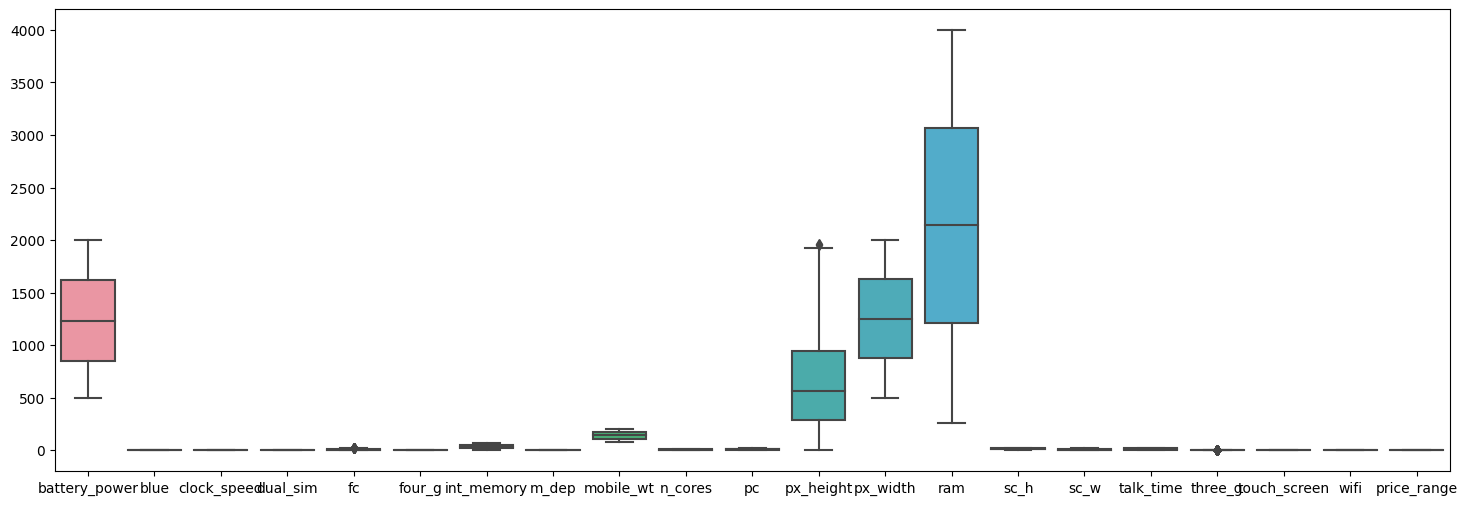

In [ ]:
plt.figure(figsize = (18,6))
sns.boxplot( data= df)

O grafico acima é mais um recurso para mostrar que existe outliers no atributo "px_height" e iremos fazer o tratamento dele abaixo.

In [ ]:
df['px_height'].quantile(0.99)

1791.01

In [ ]:
df1 = df[df['px_height'] < df['px_height'].quantile(0.99)]

<Axes: >

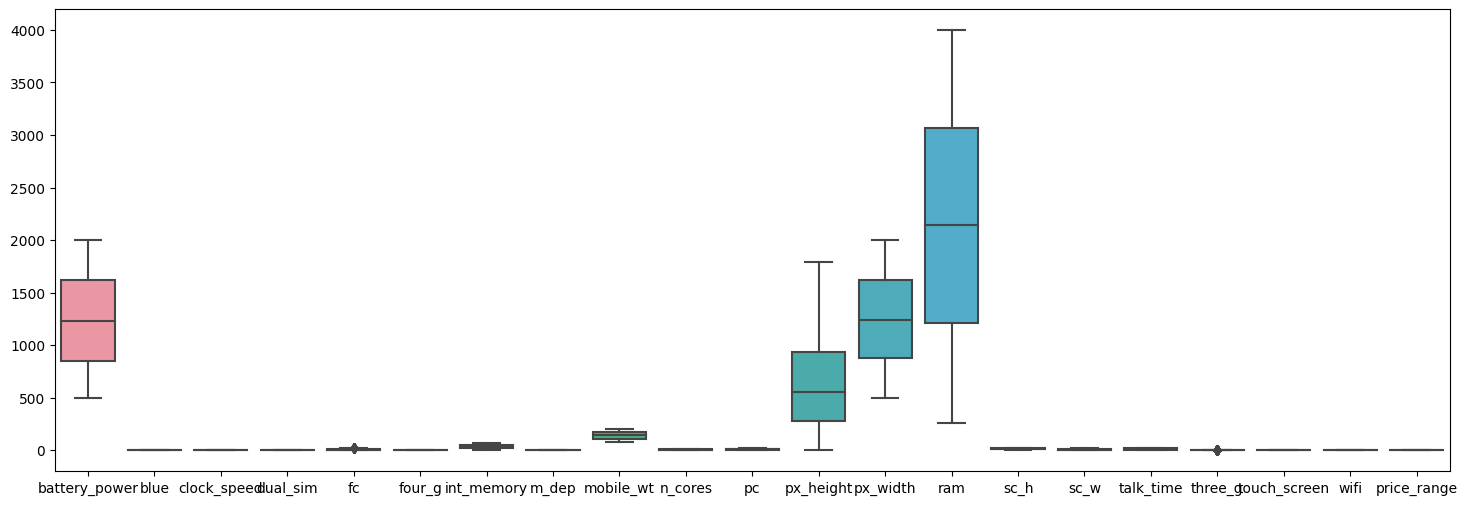

In [ ]:
plt.figure(figsize = (18,6))
sns.boxplot( data= df1)

Com a função .quantile(0.99), pude retirar 1% do dados da coluna 'px_height' que estava causando outliers no dataset. Acima, temos o novo dataset com o outliers tratados.

**Matriz e correlação e Clustemap**


<Axes: >

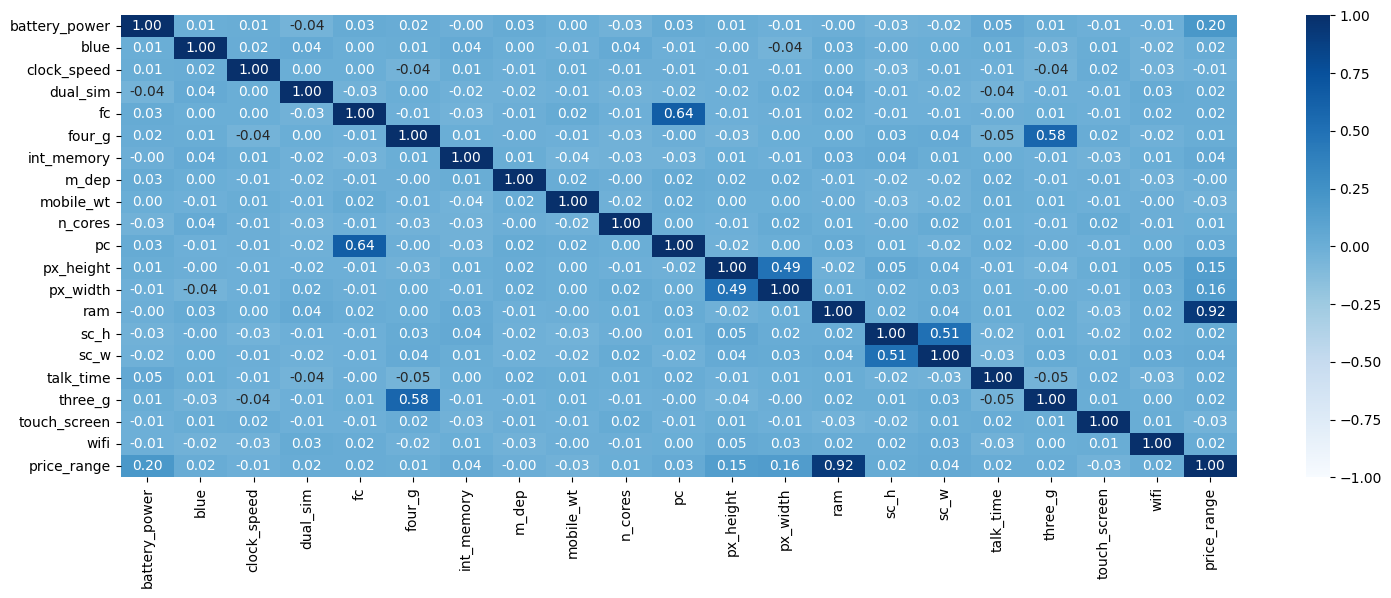

In [ ]:
plt.figure(figsize=(18,6)) #definindo o tamanho do grafico
sns.heatmap(df1.corr(), annot = True, cmap = 'Blues',vmin= -1, vmax = 1, fmt ='.2f') # annot = True, mostra os valoes / #cmap = 'blues', muda a cor do grafico para Azul.


Analisando o coeficiente de correlação acima, é possível extrair as seguinte observações:

-  Existe uma ótima correlação  entre os atributos 'price_range' com 'ram'

- Existe uma correlação media entre os atributos 'four_g' com 'three_g' , 'pc' com 'fc', 'px_width' com 'px_height', 'sc_h' com 'sc_w'.

Essas informação será bastante util para melhorar a decisão quando for fazer a Feature selection.

# 4. Pré-Processamento de dados

Nessa etapa, irei realizar a separação do conjunto de treino e teste, onde irei separa o dataset em 2 e logo em seguida fazer a seleção dos melhores atributos que sejam relevantes para ter o melhor resultado para o problema. A seleção dos melhores atributos é realizado na etapa de feature selection.

# 4.1.1 - dataset sem o feature selection

In [ ]:
# Preparação dos dados
test_size = 0.20 # Tamanho do conjunto de treino
seed = 9 # semente aleatória

array = df1.values
X = array[:,0:20] #Atributos
y = array[:,20] #classe (Alvo da analise)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada.
#Usarei a validação cruzada para treinar e avaliar os modelos usando a métrica acurácia
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratifica



# 4.1.2 - Modelagem e inferencia.

Nessa etapa, irei definir uma semente global para célula de código, necessária para garantir a reprodutividade do código com os mesmo resultados. Logo em seguida, irei avaliar qual algoritmo ( KNN, Arvore de decisão , SVN e NB ) irá se performar melhor, utilizando o hiperparametro padrão. Também utilizarei os ensembles para analizar se haverá uma perfomace melhor do que somente os algoritmos. Estou usando o metodo de validação cruzada de treino e teste e a metrica de acurária.

LR: 0.661627 (0.022464)
KNN: 0.926160 (0.020288)
CART: 0.842787 (0.017898)
NB: 0.812543 (0.032900)
SVM: 0.944459 (0.017095)
Bagging: 0.893321 (0.016478)
RF: 0.857316 (0.018618)
ET: 0.823915 (0.032468)
Ada: 0.527263 (0.109820)
GB: 0.911603 (0.015028)
Voting: 0.897102 (0.018312)


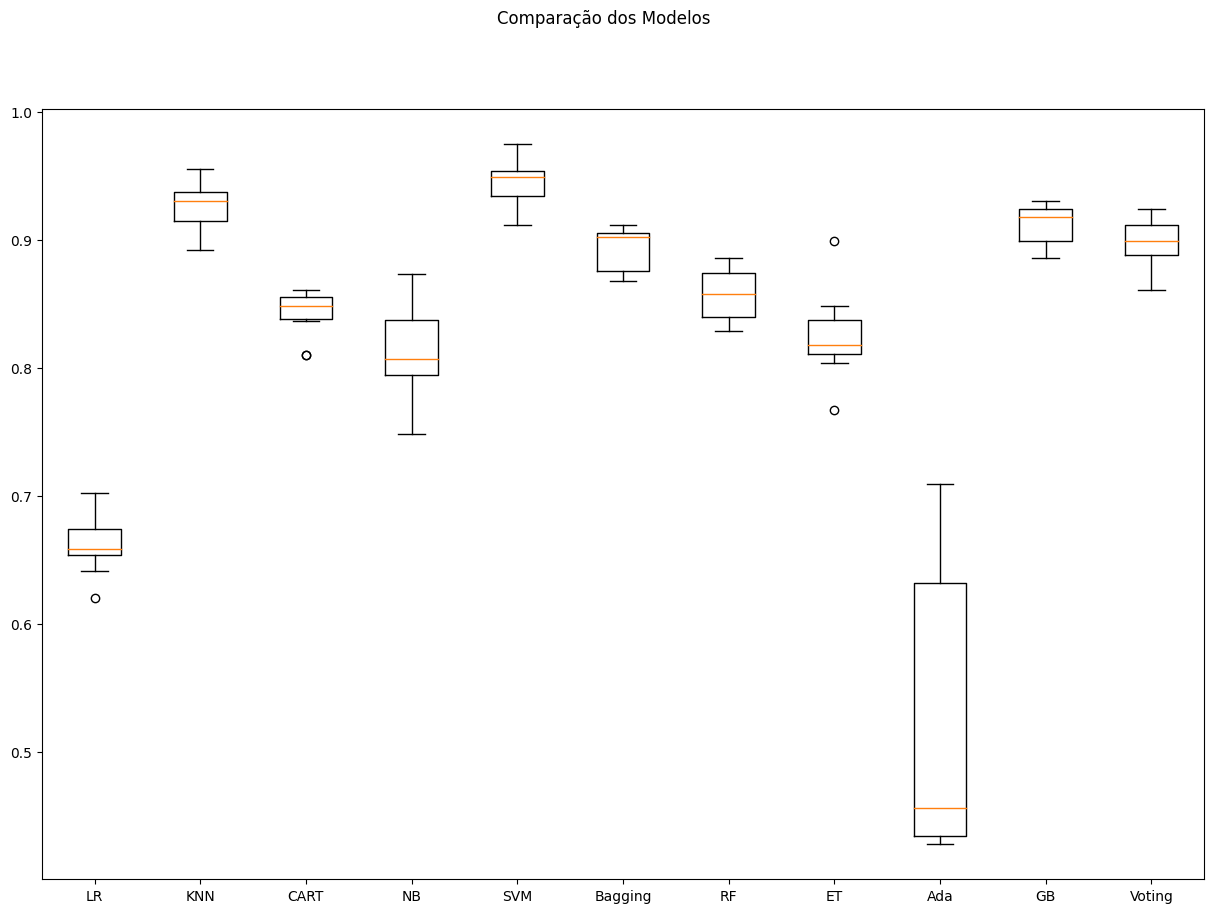

In [ ]:
# Etapa de modelagem e inferência

np.random.seed(9) # Definindo uma semente global

#Lista que armazenará os modelos
models=[]

#Criando os modelos e adicionandos-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

#Definindo os parâmetros para classificador base para o BaggingClassifier

base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

#Criando os modelos para o VotingClassifier

bases = []
model1 = LogisticRegression(max_iter = 200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos

models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees,max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees,max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados - Dataset Original
results = []
names = []

# Avaliação dos modelos

for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Após analizar os modelos acima, verifiquei, considerando a acurácia média, o modelo treinado com o SVM obteve o melhor resultado dentre os outros ( 94% de acurácia média e desvio-padrão de 1%)

# 4.1.3 - Criação e avalição de modelos : Original, Padronizado e Normalizado.

Estou repetindo parte do processo acima, utilizando a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados ( evitando o data leakage, que seria o "vazamento de informações ") e comparar o seu resultado com os modelos treinados com o dataset original.

LR-orig: 0.662 (0.022)
KNN-orig: 0.926 (0.020)
CART-orig: 0.843 (0.018)
NB-orig: 0.813 (0.033)
SVM-orig: 0.944 (0.017)
Bag-orig: 0.893 (0.016)
RF-orig: 0.857 (0.019)
ET-orig: 0.824 (0.032)
Ada-orig: 0.527 (0.110)
GB-orig: 0.912 (0.015)
Vot-orig: 0.897 (0.018)
LR-padr: 0.957 (0.015)
KNN-padr: 0.512 (0.028)
CART-padr: 0.840 (0.017)
NB-padr: 0.813 (0.033)
SVM-padr: 0.884 (0.023)
Bag-padr: 0.901 (0.014)
RF-padr: 0.857 (0.026)
ET-padr: 0.828 (0.035)
Ada-padr: 0.527 (0.110)
GB-padr: 0.913 (0.016)
Vot-padr: 0.941 (0.019)
LR-norm: 0.916 (0.024)
KNN-norm: 0.400 (0.021)
CART-norm: 0.842 (0.021)
NB-norm: 0.813 (0.033)
SVM-norm: 0.861 (0.021)
Bag-norm: 0.896 (0.013)
RF-norm: 0.860 (0.028)
ET-norm: 0.821 (0.032)
Ada-norm: 0.527 (0.110)
GB-norm: 0.912 (0.016)
Vot-norm: 0.913 (0.022)


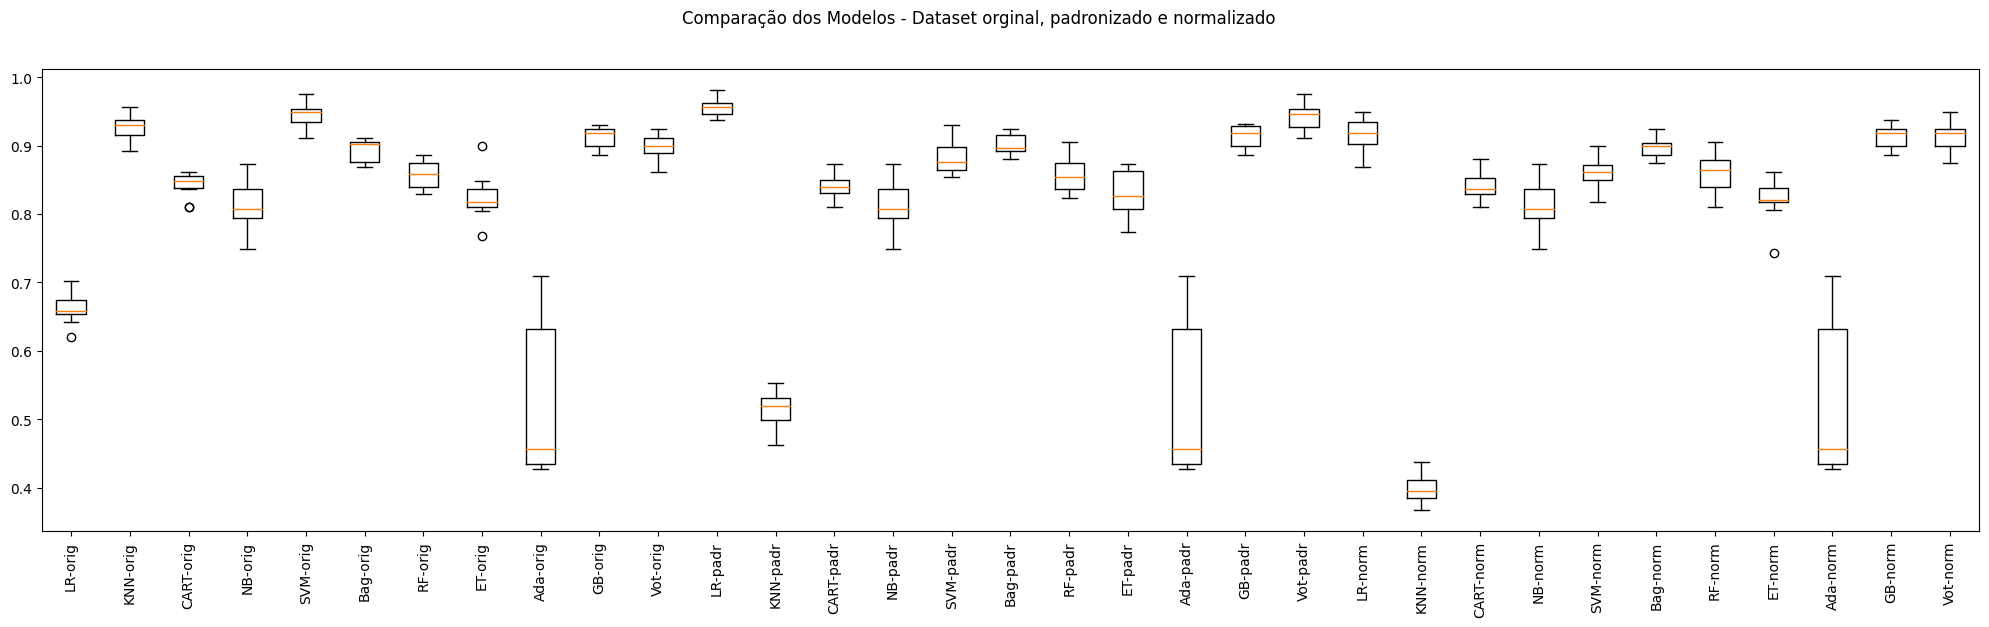

In [ ]:
np.random.seed(9) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# 5.1.1 - Modelagem e Treinamento

Apos a analise dos algoritmos com os dados originais , normalizados e padronizados, o algoritmo regressão logistica - padronizado, obteve uma performace de 95% , bem melhor do outros avaliados.
Agora, para obter um melhor desempenho do algoritmos, irei utilizar a biblioteca grid searcha para otimizar os hiperparametros. Em relação aos parametros, escolhi na penalidade l1 e l2, pois utilizei o atributo liblinear, onde ele só suporta essas duas penalidade e também porque esse atributo tem uma boa perfomace para dataset relativamente pequenos, onde o meu se enquadra.

In [ ]:

# Tuning do Regressão logistica

np.random.seed(9) # definindo uma semente global para este bloco

pipelines = []

#Definindo os componentes do pipeline

reg_log = ('LR', LogisticRegression(max_iter=200))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('LR-orig', Pipeline(steps=[reg_log])))
pipelines.append(('LR-padr', Pipeline(steps=[standard_scaler, reg_log])))
pipelines.append(('LR-norm', Pipeline(steps=[min_max_scaler, reg_log])))


param_grid = [
	  {'LR__penalty' : ['l1','l2'],
	    'LR__C' : np.logspace(-4, 4, 20),
      'LR__solver' : ['liblinear'],
      'LR__max_iter' : [200]

    }
]

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, verbose=1)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Sem tratamento de missings: LR-orig - Melhor: 0.864290 usando {'LR__C': 29.763514416313132, 'LR__max_iter': 200, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Sem tratamento de missings: LR-padr - Melhor: 0.864915 usando {'LR__C': 78.47599703514607, 'LR__max_iter': 200, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Sem tratamento de missings: LR-norm - Melhor: 0.864290 usando {'LR__C': 78.47599703514607, 'LR__max_iter': 200, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}


Nessa etapa, irei finalizar o modelo escolhido (regressão logistica - padronizada), treinando em todo o conjunto de dados de treinamento ( sem validação cruzada), e farei predições para o conjunto de teste que foi separado logo no inicio da pratica. a fim de confirmar os resultados. Primeiro, irei realizar a padronização dos dados de entrada. Depois, treinarei o modelo e exibirei a acurária de teste.

In [ ]:

# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9722222222222222


6.Avaliação dos resultados
Objetivo: analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)

Selecione as métricas de avaliação condizentes com o problema, justificando.

1- O modelo escolhido para tal problema, foi ó algoritom de regressão logistica, onde ele teve uma ótima performace , com uma acurácia de 97%




# 4.2 - feature Selection - Kbest


In [ ]:
# Preparação dos dados
array = df1.values
X = array[:,0:20] #Atributos
y = array[:,20] #classe (Alvo da analise)



Nessa etapa acima, estou separado todo os atributos que juntos compõem o atributo 'price_range'. Com isso na variavel 'X' contém todos os atributos, menos o atributo ' price_range', pois ele está separa na variavel 'Y' , onde está sendo o motivo do estudo em questão.
Essa separação dar-se o nome de holdout

In [ ]:
# SelectBest

# Seleção de atributos com o selectBest
#Seleção univariada ( Relação mais forte com a variável de saída)
best_var = SelectKBest(score_func=f_classif, k=4) #Teste ANOVA / o 'K' é o numeros de atributos para ser "escolhidos"

# Executa a função de pontuação em (X, Y) e obtém os atributos selecionados
fit = best_var.fit(X,y)

# Reduz X para os atrivutos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos', features.shape[1])


# Exibe os atributos originais
print("\nAtributos Originais:", df1.columns[0:20])

#Exibe as pontuações de cada atributos e os 4 escolhidos ( com as pontuações mais altas)
np.set_printoptions(precision=3) # Casas decimais
print("\nScores dos atributos originais:", fit.scores_)
print('\nAtributos selecionados:',best_var.get_feature_names_out(input_features=df1.columns[0:20]))


Número original de atributos: 20

Número reduzido de atributos 4

Atributos Originais: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

Scores dos atributos originais: [3.039e+01 5.259e-01 5.305e-01 4.393e-01 6.862e-01 7.648e-01 2.820e+00
 1.583e+00 3.355e+00 2.446e+00 7.197e-01 1.878e+01 2.187e+01 3.557e+03
 2.461e+00 1.844e+00 1.755e+00 4.744e-01 1.493e+00 2.439e-01]

Atributos selecionados: ['battery_power' 'px_height' 'px_width' 'ram']


Os melhores atributos selecionados pelo Kbest foram :

battery_power ,px_height, px_width, ram.

In [ ]:
# Criando dataset com o atributos selecionados pelo Kbest
atributos_kbest = ['battery_power','px_height','px_width','ram','price_range']
df_kbest = df1[atributos_kbest]
df_kbest

,battery_power,px_height,px_width,ram,price_range
0,842,20,756,2549,1
1,1021,905,1988,2631,2
2,563,1263,1716,2603,2
3,615,1216,1786,2769,2
4,1821,1208,1212,1411,1
...,...,...,...,...,...
1995,794,1222,1890,668,0
1996,1965,915,1965,2032,2
1997,1911,868,1632,3057,3
1998,1512,336,670,869,0


#4.3 Feature selection - Eliminação recursiva

In [ ]:
# Eliminação Recursiva de Atributos

#Criação do modelo

modelo = LogisticRegression(max_iter=200) # maximo de 200 interação

# Eliminação recursiva de atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X,y)

#print dos resultados
print("Atributos Originais:", df1.columns[0:20])

# Exibe os atributos selecionados (Marcados como True em " Atributos selecionados
# e com valor1 em "Ranking dos atributos")

print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores atributos: %d" % fit.n_features_)
print("\nNomes dos atributos selecionados: %s" % fit.get_feature_names_out(input_features=df1.columns[0:20]))

Atributos Originais: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

Atributos Selecionados: [False False False False False  True False  True False False False False
 False False False False False  True  True False]

Ranking de atributos: [17  2  5  3 10  1 12  1 13  6 11 15 16 14  7  8  9  1  1  4]

Qtd de melhores atributos: 4

Nomes dos atributos selecionados: ['four_g' 'm_dep' 'three_g' 'touch_screen']


In [ ]:
# Criação de um novo dataset com o atributos que possui maior relevância. - Eliminação recursiva

atributos = ['four_g', 'm_dep', 'three_g', 'touch_screen', 'price_range']
df_recursiva = df1[atributos] # adicionando os atributos ao novo dataframe
df_recursiva

,four_g,m_dep,three_g,touch_screen,price_range
0,0,0.6,0,0,1
1,1,0.7,1,1,2
2,1,0.9,1,1,2
3,0,0.8,1,0,2
4,1,0.6,1,1,1
...,...,...,...,...,...
1995,1,0.8,1,1,0
1996,0,0.2,1,1,2
1997,1,0.7,1,1,3
1998,1,0.1,1,1,0


# 4.4 - Feature selection - Extratrees



In [ ]:
# importância de atributos com Extratrees

#Criação do modelo para seleção de atributos

modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

#Exibe os atributos originais
print("\nAtributos originais:", df1.columns[0:20])

# Exibe a pontuação de importância para cada atributo ( quanto maior a pontuação , mais importante é o atributo).
print(modelo.feature_importances_)


Atributos originais: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
[0.061 0.02  0.033 0.02  0.032 0.017 0.036 0.033 0.036 0.032 0.033 0.048
 0.049 0.397 0.033 0.033 0.034 0.014 0.018 0.02 ]


In [ ]:
# Criando dataset com os atributos selecionado pelo ExtraTrees
#Obs: POr coiciendência, são os mesmo atributos que foi escolhidos pelo Kbest também.

atributos_extratrees = ['battery_power','px_height','px_width','ram','price_range']
df_extratrees = df1[atributos_extratrees]
df_extratrees

,battery_power,px_height,px_width,ram,price_range
0,842,20,756,2549,1
1,1021,905,1988,2631,2
2,563,1263,1716,2603,2
3,615,1216,1786,2769,2
4,1821,1208,1212,1411,1
...,...,...,...,...,...
1995,794,1222,1890,668,0
1996,1965,915,1965,2032,2
1997,1911,868,1632,3057,3
1998,1512,336,670,869,0


Nessa etapa, O Extratrees classificou os atributos : 'battery_power', 'px_height', 'px_width', 'ram' com as melhores pontuação dentro os demais.
Note que os mesmo atributos que foram selecionado com a melhor pontuação, são os mesmo que foram selecionado acima com a feature selection - Kbest

###5. Separação em conjunto de treino e conjunto de teste com Holdout

###5.1.1 - Utilizando dataset original

In [ ]:
test_size = 0.20 # Tamanho do conjunto de teste
seed = 9 # semente aleatória

#Separação em conjuntos de treino e teste

array = df1.values
X = array[:,0:20] # Atributos
y = array[:,20] # Classe

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação



### 5.1.2 Modelagem e inferência
Criação e avaliação de modelos : Linha base

In [ ]:
# Etapa de modelagem e inferência

np.random.seed(9) # Definindo uma semente global

#Lista que armazenará os modelos
models=[]

#Criando os modelos e adicionandos-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

#Definindo os parâmetros para classificador base para o BaggingClassifier

base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

#Criando os modelos para o VotingClassifier

bases = []
model1 = LogisticRegression(max_iter = 200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos

models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees,max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees,max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados - Dataset Original
results = []
names = []

# Avaliação dos modelos

for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.661627 (0.022464)
KNN: 0.926160 (0.020288)
CART: 0.842787 (0.017898)
NB: 0.812543 (0.032900)
SVM: 0.944459 (0.017095)
Bagging: 0.893321 (0.016478)
RF: 0.857316 (0.018618)
ET: 0.823915 (0.032468)
Ada: 0.527263 (0.109820)
GB: 0.911603 (0.015028)
Voting: 0.897102 (0.018312)


Nessa etapa, o algoritmo SVM teve um acurária de ( 94,44%) melhor desempenho dentre as outras avaliados. Na proxima etapa, irei aplicar a normalização e padronização dentro do dataset e verificar a acucaria de cada modelo.

LR-orig: 0.662 (0.022)
KNN-orig: 0.926 (0.020)
CART-orig: 0.843 (0.018)
NB-orig: 0.813 (0.033)
SVM-orig: 0.944 (0.017)
Bag-orig: 0.893 (0.016)
RF-orig: 0.857 (0.019)
ET-orig: 0.824 (0.032)
Ada-orig: 0.527 (0.110)
GB-orig: 0.912 (0.015)
Vot-orig: 0.897 (0.018)
LR-padr: 0.957 (0.015)
KNN-padr: 0.512 (0.028)
CART-padr: 0.840 (0.017)
NB-padr: 0.813 (0.033)
SVM-padr: 0.884 (0.023)
Bag-padr: 0.901 (0.014)
RF-padr: 0.857 (0.026)
ET-padr: 0.828 (0.035)
Ada-padr: 0.527 (0.110)
GB-padr: 0.913 (0.016)
Vot-padr: 0.941 (0.019)
LR-norm: 0.916 (0.024)
KNN-norm: 0.400 (0.021)
CART-norm: 0.842 (0.021)
NB-norm: 0.813 (0.033)
SVM-norm: 0.861 (0.021)
Bag-norm: 0.896 (0.013)
RF-norm: 0.860 (0.028)
ET-norm: 0.821 (0.032)
Ada-norm: 0.527 (0.110)
GB-norm: 0.912 (0.016)
Vot-norm: 0.913 (0.022)


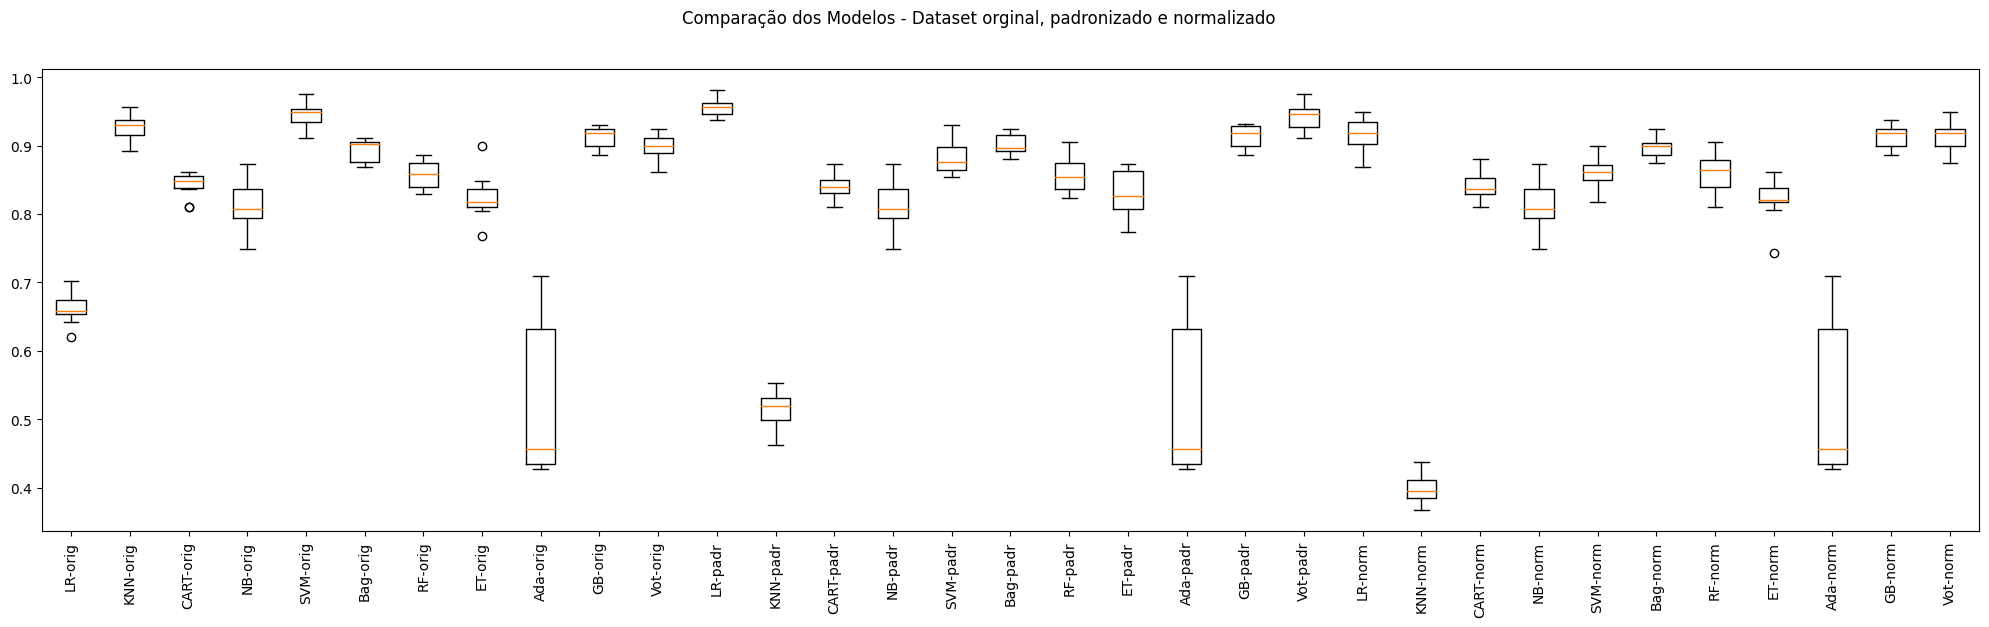

In [ ]:
np.random.seed(9) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()


Nessa etapa, podemos vê que o melhor modelo utilizando o dataset original, foi o modelo de regressão logistica padronizado, que obtive uma acuracia de 94,5%.

## 5.2.1 Separação em conjunto de treino e conjunto de teste com Holdout - Dataset feature selection - Kbest




In [ ]:
test_size = 0.20 # Tamanho do conjunto de teste
seed = 9 # Semente aleatória

# Separação em conjuntos de treino e teste

array_kbest = df_kbest.values

X01 = array_kbest[:,0:4] # Atributos
y01 = array_kbest[:,4] # Classe

X01_train, X01_test, y01_train, y01_test = train_test_split(X01, y01,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação



In [ ]:
# Etapa de modelagem e inferência

np.random.seed(9) # Definindo uma semente global

#Lista que armazenará os modelos
models=[]

#Criando os modelos e adicionandos-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

#Definindo os parâmetros para classificador base para o BaggingClassifier

base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

#Criando os modelos para o VotingClassifier

bases = []
model1 = LogisticRegression(max_iter = 200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos

models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees,max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees,max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados - Dataset com feature select
results = []
names = []

# Avaliação dos modelos

for name, model in models:
  cv_results = cross_val_score(model, X01_train, y01_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.954526 (0.016246)
KNN: 0.924887 (0.021541)
CART: 0.862993 (0.021622)
NB: 0.801178 (0.023979)
SVM: 0.946959 (0.016553)
Bagging: 0.902146 (0.009883)
RF: 0.912885 (0.016341)
ET: 0.928043 (0.013538)
Ada: 0.529162 (0.111777)
GB: 0.914147 (0.014719)
Voting: 0.950115 (0.017779)


Já com a feature selection ( kbest) aplicada ao dataset original, obtivemos uma desempenho melhor para regressão logistica, com a acuracia de 95,45%. Proximo passo é avaliar o mesmo dataset com o conjunto de dados padrozido e normalizado, para observer se haverá alguma mudança.

LR-orig: 0.955 (0.016)
KNN-orig: 0.925 (0.022)
CART-orig: 0.863 (0.022)
NB-orig: 0.801 (0.024)
SVM-orig: 0.947 (0.017)
Bag-orig: 0.902 (0.010)
RF-orig: 0.913 (0.016)
ET-orig: 0.928 (0.014)
Ada-orig: 0.529 (0.112)
GB-orig: 0.914 (0.015)
Vot-orig: 0.950 (0.018)
LR-padr: 0.952 (0.017)
KNN-padr: 0.886 (0.030)
CART-padr: 0.860 (0.013)
NB-padr: 0.801 (0.024)
SVM-padr: 0.941 (0.017)
Bag-padr: 0.908 (0.017)
RF-padr: 0.914 (0.016)
ET-padr: 0.932 (0.010)
Ada-padr: 0.529 (0.112)
GB-padr: 0.913 (0.018)
Vot-padr: 0.941 (0.017)
LR-norm: 0.941 (0.012)
KNN-norm: 0.893 (0.027)
CART-norm: 0.867 (0.017)
NB-norm: 0.801 (0.024)
SVM-norm: 0.941 (0.020)
Bag-norm: 0.908 (0.011)
RF-norm: 0.912 (0.009)
ET-norm: 0.927 (0.011)
Ada-norm: 0.529 (0.112)
GB-norm: 0.912 (0.018)
Vot-norm: 0.942 (0.015)


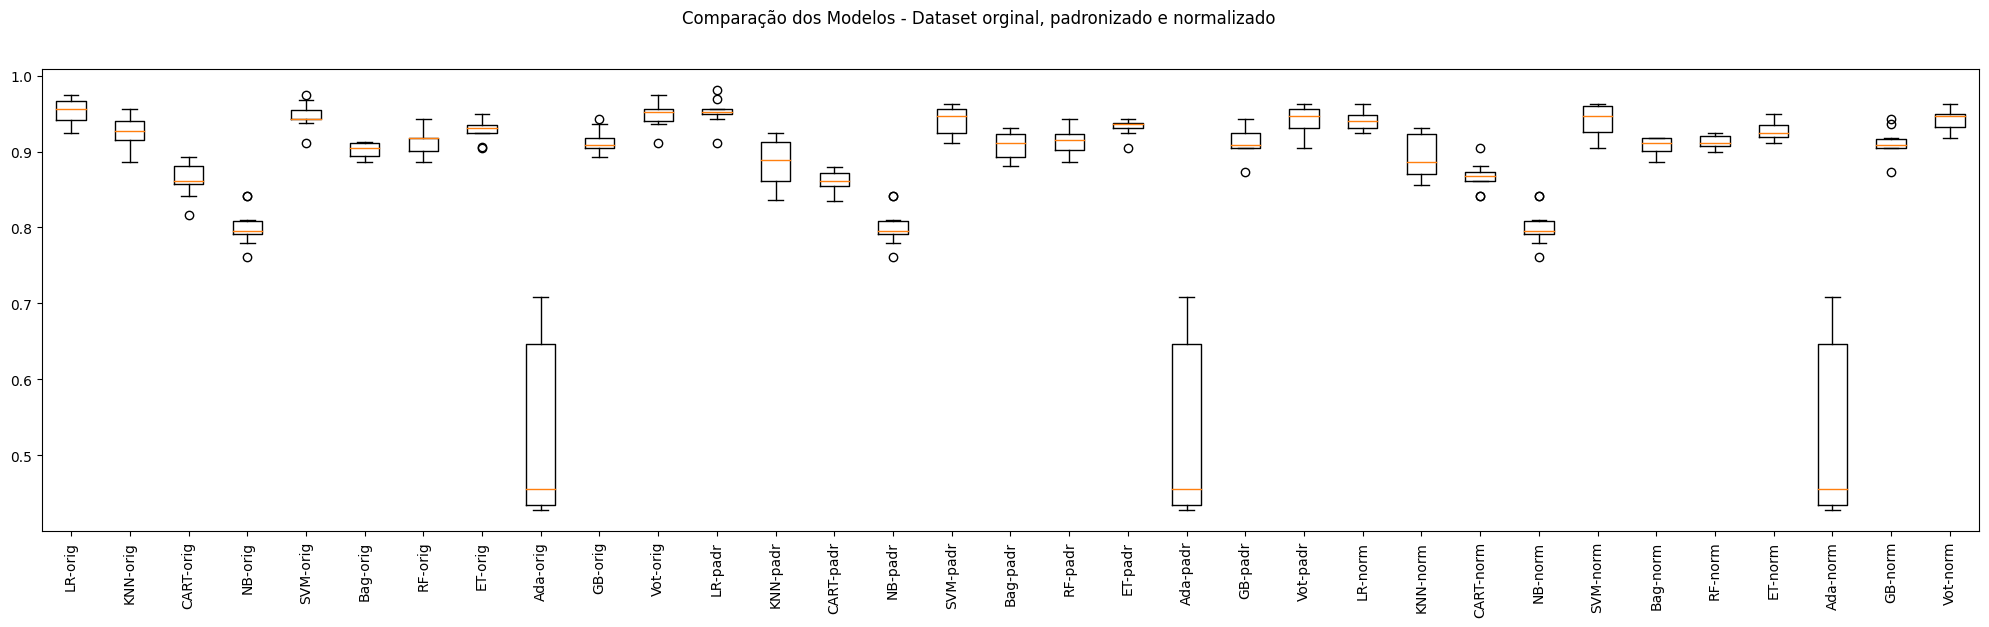

In [ ]:
np.random.seed(9) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X01_train, y01_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()


Ja para o dataset com a aplicação do feature selection (Kbest), o melhor modelo é LR-orig, que obtive uma acuracia de 95.5%

#5.3.1 Separação em conjunto de treino e conjunto de teste com Holdout - Dataset feature selection - eliminação recursiva




In [ ]:
test_size = 0.20 # Tamanho do conjunto de teste
seed = 9 # Semente aleatória

# Separação em conjuntos de treino e teste

array_rec = df_recursiva.values

X02 = array_rec[:,0:4] # Atributos
y02 = array_rec[:,4] # Classe

X02_train, X02_test, y02_train, y02_test = train_test_split(X02, y02,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [ ]:
# Etapa de modelagem e inferência

np.random.seed(9) # Definindo uma semente global

#Lista que armazenará os modelos
models=[]

#Criando os modelos e adicionandos-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

#Definindo os parâmetros para classificador base para o BaggingClassifier

base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

#Criando os modelos para o VotingClassifier

bases = []
model1 = LogisticRegression(max_iter = 200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos

models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees,max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees,max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados - Dataset com feature select
results = []
names = []

# Avaliação dos modelos

for name, model in models:
  cv_results = cross_val_score(model, X02_train, y02_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.256281 (0.023500)
KNN: 0.244288 (0.022628)
CART: 0.247421 (0.031723)
NB: 0.237398 (0.014564)
SVM: 0.238616 (0.018395)
Bagging: 0.253742 (0.025845)
RF: 0.253065 (0.036182)
ET: 0.247421 (0.031723)
Ada: 0.248674 (0.037298)
GB: 0.246155 (0.028960)
Voting: 0.253125 (0.019652)


Nesses primeiros modelos,com o feature selection ( seleção recursiva) o desempenho dos modelos ficaram abaixo de 50%, por isso não escolherei nenhum modelo, irei avaliar novamente com o dataset padronizado e normalizado.

LR-orig: 0.256 (0.024)
KNN-orig: 0.244 (0.023)
CART-orig: 0.247 (0.032)
NB-orig: 0.237 (0.015)
SVM-orig: 0.239 (0.018)
Bag-orig: 0.254 (0.026)
RF-orig: 0.253 (0.036)
ET-orig: 0.247 (0.032)
Ada-orig: 0.249 (0.037)
GB-orig: 0.246 (0.029)
Vot-orig: 0.253 (0.020)
LR-padr: 0.253 (0.022)
KNN-padr: 0.237 (0.015)
CART-padr: 0.247 (0.032)
NB-padr: 0.237 (0.015)
SVM-padr: 0.240 (0.017)
Bag-padr: 0.246 (0.034)
RF-padr: 0.252 (0.027)
ET-padr: 0.247 (0.032)
Ada-padr: 0.249 (0.037)
GB-padr: 0.246 (0.029)
Vot-padr: 0.254 (0.022)
LR-norm: 0.256 (0.023)
KNN-norm: 0.259 (0.028)
CART-norm: 0.247 (0.032)
NB-norm: 0.237 (0.015)
SVM-norm: 0.239 (0.014)
Bag-norm: 0.256 (0.022)
RF-norm: 0.249 (0.027)
ET-norm: 0.247 (0.032)
Ada-norm: 0.249 (0.037)
GB-norm: 0.246 (0.029)
Vot-norm: 0.254 (0.019)


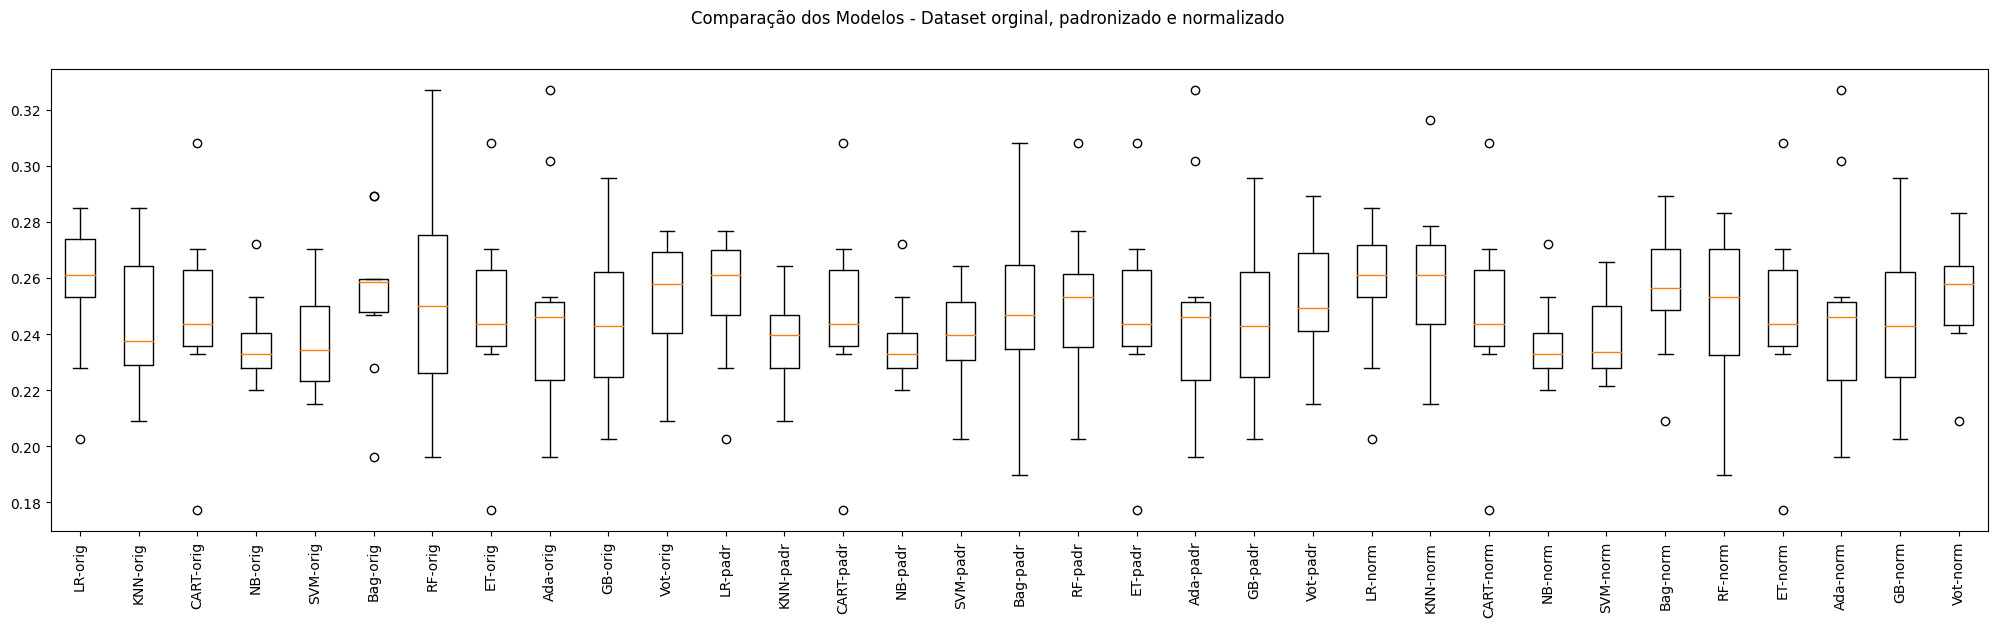

In [ ]:
np.random.seed(9) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X02_train, y02_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Novamente, a acuracia para os modelos com o dataset utilizando a feature selection - Elminicação recursiva, não performou bem para um bom modelo.Por isso não será utilizado.


#5.4.1 Separação em conjunto de treino e conjunto de teste com Holdout - Dataset feature selection - ExtraTrees

In [ ]:
test_size = 0.20 # Tamanho do conjunto de teste
seed = 9 # Semente aleatória

# Separação em conjuntos de treino e teste

array_ex = df_extratrees.values

X03 = array_ex[:,0:4] # Atributos
y03 = array_ex[:,4] # Classe

X03_train, X03_test, y03_train, y03_test = train_test_split(X03, y03,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 4
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

In [ ]:
# Etapa de modelagem e inferência

np.random.seed(9) # Definindo uma semente global

#Lista que armazenará os modelos
models=[]

#Criando os modelos e adicionandos-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

#Definindo os parâmetros para classificador base para o BaggingClassifier

base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

#Criando os modelos para o VotingClassifier

bases = []
model1 = LogisticRegression(max_iter = 200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos

models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees,max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees,max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados - Dataset com feature select
results = []
names = []

# Avaliação dos modelos

for name, model in models:
  cv_results = cross_val_score(model, X03_train, y03_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.953914 (0.010916)
KNN: 0.926768 (0.012499)
CART: 0.873106 (0.028423)
NB: 0.803662 (0.023647)
SVM: 0.946970 (0.011709)
Bagging: 0.906566 (0.016655)
RF: 0.913510 (0.017620)
ET: 0.924874 (0.011061)
Ada: 0.602273 (0.167416)
GB: 0.907828 (0.015204)
Voting: 0.950126 (0.012028)


Nessa etapa, teremos, por coiencidencia, os mesmo resultados que obtivemos com o KBest,  foi  escolhido pelo extratrees também

LR-orig: 0.954 (0.011)
KNN-orig: 0.927 (0.012)
CART-orig: 0.873 (0.028)
NB-orig: 0.804 (0.024)
SVM-orig: 0.947 (0.012)
Bag-orig: 0.907 (0.017)
RF-orig: 0.914 (0.018)
ET-orig: 0.925 (0.011)
Ada-orig: 0.602 (0.167)
GB-orig: 0.908 (0.015)
Vot-orig: 0.950 (0.012)
LR-padr: 0.952 (0.010)
KNN-padr: 0.879 (0.029)
CART-padr: 0.882 (0.015)
NB-padr: 0.804 (0.024)
SVM-padr: 0.943 (0.014)
Bag-padr: 0.910 (0.020)
RF-padr: 0.913 (0.015)
ET-padr: 0.929 (0.013)
Ada-padr: 0.602 (0.166)
GB-padr: 0.908 (0.015)
Vot-padr: 0.948 (0.007)
LR-norm: 0.941 (0.007)
KNN-norm: 0.888 (0.025)
CART-norm: 0.874 (0.024)
NB-norm: 0.804 (0.024)
SVM-norm: 0.947 (0.009)
Bag-norm: 0.908 (0.015)
RF-norm: 0.915 (0.021)
ET-norm: 0.930 (0.009)
Ada-norm: 0.602 (0.167)
GB-norm: 0.905 (0.013)
Vot-norm: 0.948 (0.008)


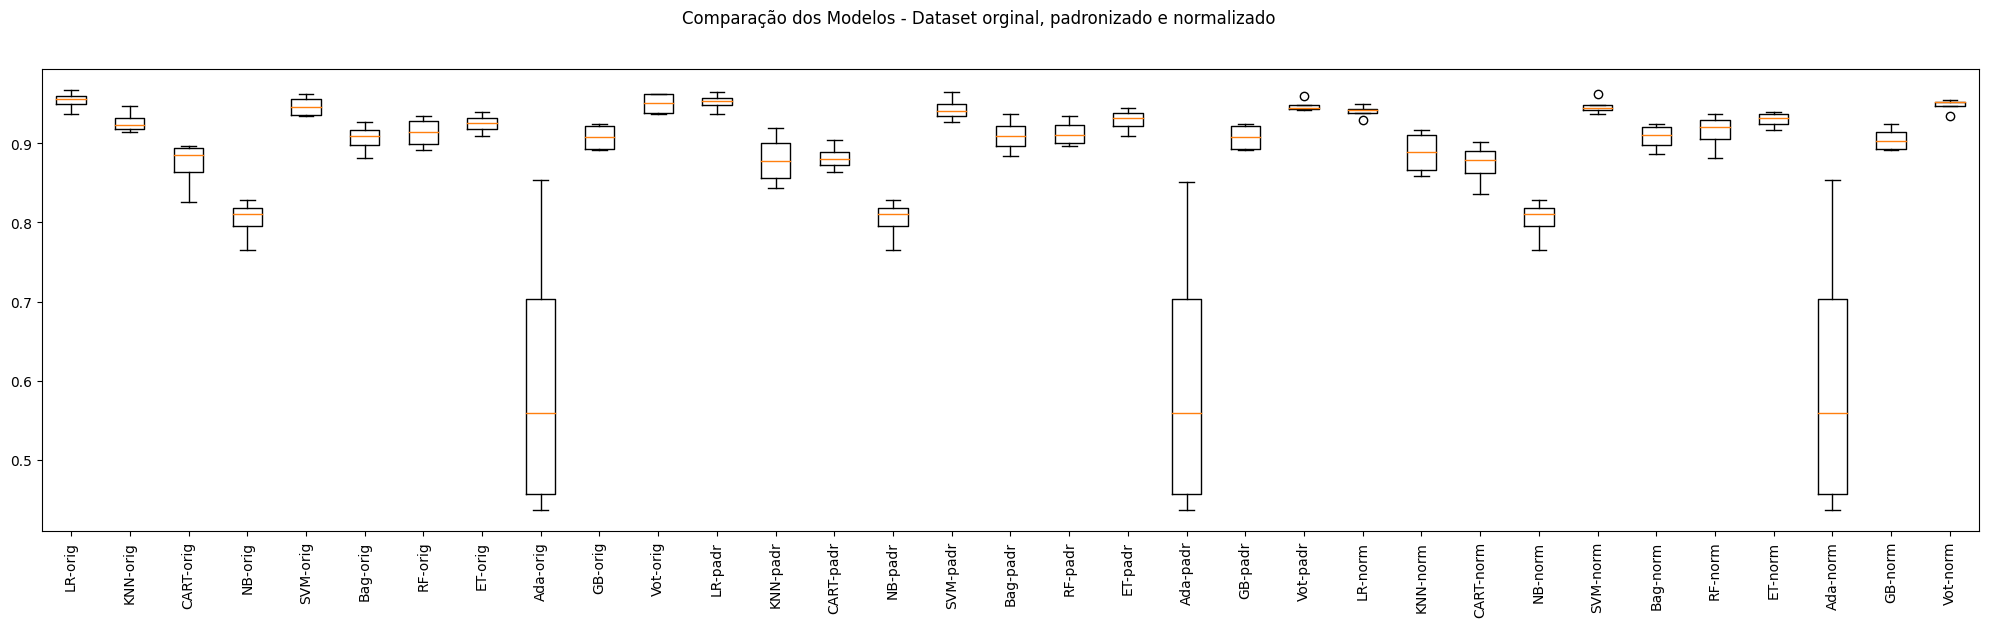

In [ ]:
np.random.seed(9) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X03_train, y03_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# 6. Modelagem e Treinamento


Objetivo: construir modelos para resolver o problema em questão.

Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas. Há algum ajuste inicial para os hiperparâmetros? O modelo foi devidamente treinado? Foi observado problema de underfitting? É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas. Há algum método avançado ou mais complexo que possa ser avaliado? Posso criar um comitê de modelos diferentes para o problema (ensembles)?

O algoritmo que teve a melhor acurácia de teste , foi o LR-Orig 95.5%, com a aplicação do feature selection - Kbesk

6.1 - Otimização dos hiperparâmetros

Agora irei verificar se é possível encontrar uma configuração de modelo que supere os melhores resultados até o momento. Atráves da biblioteca Grid Search irei executar a otimização dos hiperparâmetros do algoritmo escolhido LR-Orig ( dataset com feature selection)

In [ ]:
# Tuning do Regressão logistica

np.random.seed(9) # definindo uma semente global para este bloco

pipelines = []

#Definindo os componentes do pipeline

reg_log = ('LR', LogisticRegression(max_iter=200))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('LR-orig', Pipeline(steps=[reg_log])))
pipelines.append(('LR-padr', Pipeline(steps=[standard_scaler, reg_log])))
pipelines.append(('LR-norm', Pipeline(steps=[min_max_scaler, reg_log])))


param_grid = [
	  {'LR__penalty' : ['l1','l2'],
	    'LR__C' : np.logspace(-4, 4, 20),
      'LR__solver' : ['liblinear'],
      'LR__max_iter' : [200]

    }
]

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, verbose=1)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Fitting 4 folds for each of 40 candidates, totalling 160 fits
Sem tratamento de missings: LR-orig - Melhor: 0.856692 usando {'LR__C': 11.288378916846883, 'LR__max_iter': 200, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Sem tratamento de missings: LR-padr - Melhor: 0.856692 usando {'LR__C': 11.288378916846883, 'LR__max_iter': 200, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Fitting 4 folds for each of 40 candidates, totalling 160 fits
Sem tratamento de missings: LR-norm - Melhor: 0.858586 usando {'LR__C': 29.763514416313132, 'LR__max_iter': 200, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}


In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X03_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X03_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y03_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X03_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y03_test, predictions))

0.9696969696969697


#Finalização do Projeto

Pude observar que mesmo utilizando o feature selection, obtive uma acurária menor do que utilizando todos os atributos, como utilizado acima do projeto. Mesmo obtendo uma acuraria de de 97%, utilizei o feature selection para buscar um resultado melhor e também utilizar algumas tecnicas ensinando nos modulos.